**Install Required Libraries**

In [1]:

!pip install scikit-image scikit-learn matplotlib

**Import Libraries**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from sklearn.cluster import KMeans
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

**Load Mona Lisa Image**

In [3]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/800px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg'
monalisa = io.imread(url)
original_image = monalisa.copy()


**Convert to LAB and Grayscale**

In [4]:
monalisa_lab = color.rgb2lab(monalisa)
monalisa_gray = color.rgb2gray(monalisa)
sobel_edge = filters.sobel(monalisa_gray)
gaussian_blur = filters.gaussian(monalisa_gray, sigma=2)

**Display Preprocessed Images**

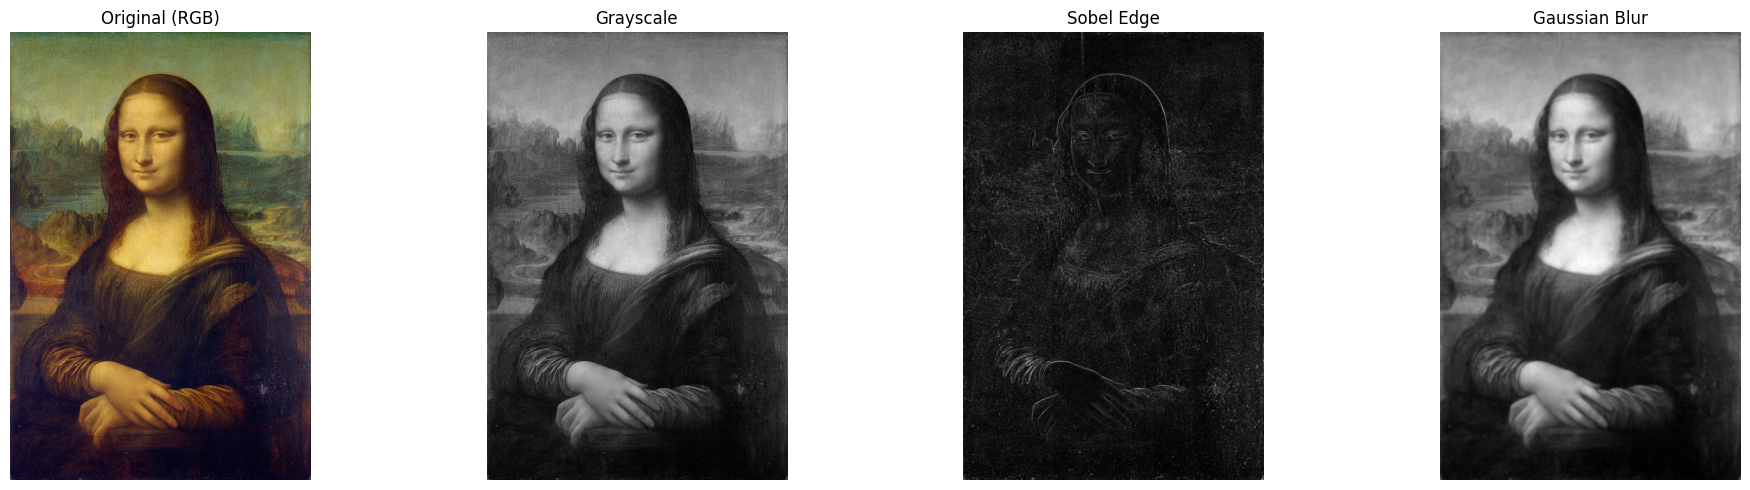

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(original_image)
axes[0].set_title("Original (RGB)")
axes[1].imshow(monalisa_gray, cmap='gray')
axes[1].set_title("Grayscale")
axes[2].imshow(sobel_edge, cmap='gray')
axes[2].set_title("Sobel Edge")
axes[3].imshow(gaussian_blur, cmap='gray')
axes[3].set_title("Gaussian Blur")
for ax in axes: ax.axis('off')
plt.tight_layout()
plt.show()

**Feature Vector for Clustering: [L, A, B, Edge, X, Y]**


In [6]:
h, w = monalisa_gray.shape
L, A, B = monalisa_lab[:, :, 0], monalisa_lab[:, :, 1], monalisa_lab[:, :, 2]
X, Y = np.meshgrid(np.arange(w), np.arange(h))
X = X / w * 100
Y = Y / h * 100
features = np.stack([L, A, B, sobel_edge, X, Y], axis=2).reshape(-1, 6)

**Apply K-Means**

In [7]:
k = 32
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(features)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

**Reconstruct Image**

In [8]:
reconstructed_lab = centroids[labels][:, :3].reshape(h, w, 3)
reconstructed_rgb = (color.lab2rgb(reconstructed_lab) * 255).astype(np.uint8)

**Evaluate Compression Quality**

In [9]:
psnr_val = psnr(original_image, reconstructed_rgb)
ssim_val = ssim(original_image, reconstructed_rgb, channel_axis=2)

**Show Original vs Compressed**

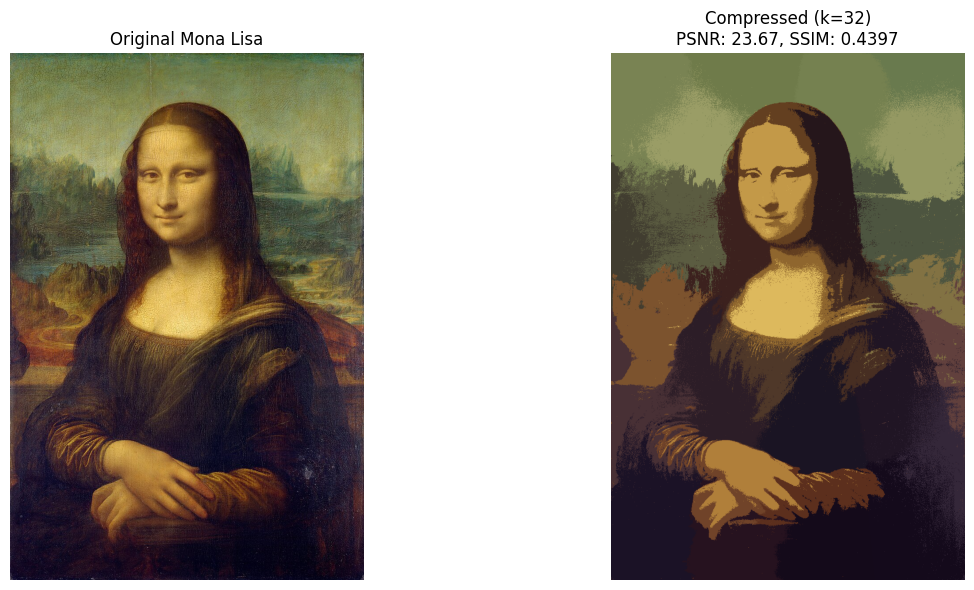

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(original_image)
axes[0].set_title("Original Mona Lisa")
axes[1].imshow(reconstructed_rgb)
axes[1].set_title(f"Compressed (k={k})\nPSNR: {psnr_val:.2f}, SSIM: {ssim_val:.4f}")
for ax in axes: ax.axis('off')
plt.tight_layout()
plt.show()

**Visualize Color Palette from Clusters**

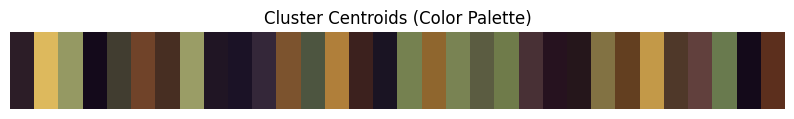

In [11]:
palette = centroids[:, :3]
palette_rgb = color.lab2rgb(palette.reshape(-1, 1, 3)).reshape(-1, 3)
fig, ax = plt.subplots(figsize=(10, 2))
ax.imshow([palette_rgb], extent=[0, 100, 0, 10])
ax.set_title("Cluster Centroids (Color Palette)")
ax.axis('off')
plt.show()